In [1]:
#self_confining.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of self-confining ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'fast_gravity = ', fast_gravity
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 2, 241)
total_ring_mass =  2e-09
shear_viscosity =  1e-12
bulk_viscosity =  1.5e-12
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.03, 'e_prime': 0.0}
fast_gravity =  False
e.min() =  0.029838034826586066
e.max() =  0.030162777666431474


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  20833.3333333


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [5]:
#inner, outer, and average streamline's orbit elements
a_inner = a[:, 0, :].mean(axis=1)
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_avg = (a_inner + a_outer)/2
e_inner = e[:, 0, :].mean(axis=1)
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_avg = (e_inner + e_outer)/2
q_inner = a_inner*(1.0 - e_inner)
q_outer = a_outer*(1.0 - e_outer)
Q_inner = a_inner*(1.0 + e_inner)
Q_outer = a_outer*(1.0 + e_outer)
dr_peri = q_outer - q_inner
dr_apo = Q_outer - Q_inner
delta_a = a_outer - a_inner

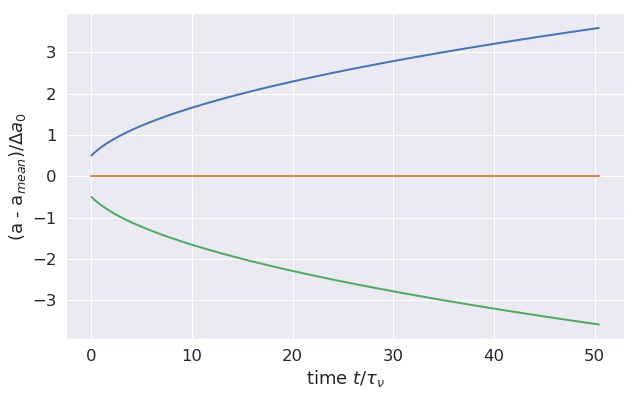

In [6]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_avg)/delta_a[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_avg - a_avg)/delta_a[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_avg)/delta_a[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')

initial delta_a =  0.0005000030000008593


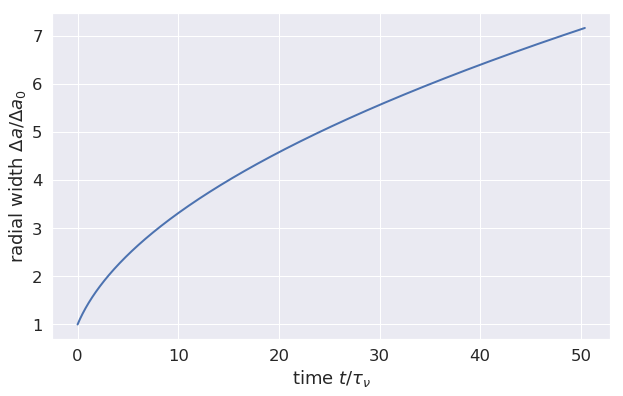

In [7]:
#plot delta_a versus time
delta_a = a_outer - a_inner
print 'initial delta_a = ', delta_a[0]
x = times_viscous
y = delta_a/delta_a[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

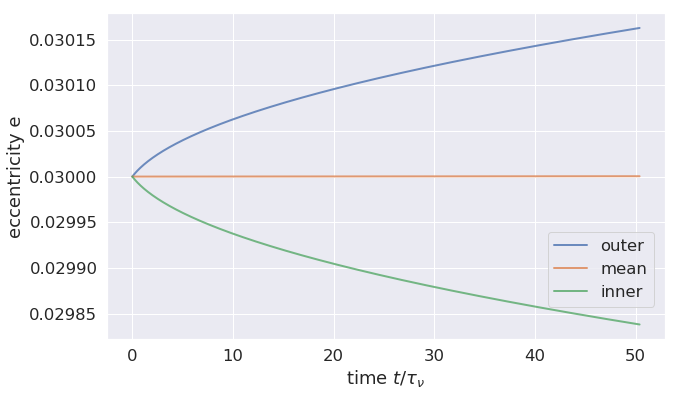

In [8]:
#plot streamline's e-evolution
twopi = 2*np.pi
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend(loc=(0.79, 0.1))